In [38]:
import pandas as pd

file = '수업기록데이터.csv'
df = pd.read_csv(file)

In [39]:
df.head()

,record_id,student_id,mission_id,student_performance,student_assessment,date,competency_label_1,competency_label_2,competency_label_3,competency_label_4
0,11,16,5,"(배현주)기획과 촬영 관련 아이디어를 보통 수준으로 제시하고 있으나, 적극성은 다소...",(배현주)친구의 준비성을 언급하면서 편안한 분위기를 만들어 대인관계역량이 좋은 것으...,2021-08-28,3,3,3,3
1,12,32809,5,(배현주)기획과 촬영 아이디어를 아주 활발하게 제시함.,(배현주)대화를 적극적으로 이끌어가며 자신의 의견을 정확하게 이야기하고 친구의 반응...,2021-08-28,3,4,3,3
2,13,18,5,(배현주)기획과 촬영 아이디어를 제대로 제시하지 못함.,(배현주)강사와 친구들의 질문과 대화에 제대로 참여하지 않는 것으로 보아 대인관계역...,2021-08-28,3,2,3,3
3,14,33625,5,(배현주)기획과 촬영 아이디어를 충분히 제안하지 못함.,(배현주)자신의 의견을 이유를 들어 설명하여 의사 전달 능력이 뛰어남.\r\n친구의...,2021-08-28,3,4,3,3
4,15,16,6,"(배현주)강사가 준비한 참고영상을 집중해서 보았으나, 연기와 촬영 관련 의견을 적극...",(배현주)참고영상을 한눈팔지 않고 시청하여 집중력이 뛰어남.\r\n참고영상을 통해 ...,2021-08-28,3,3,4,3


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112279 entries, 0 to 112278
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   record_id            112279 non-null  int64 
 1   student_id           112279 non-null  int64 
 2   mission_id           112279 non-null  int64 
 3   student_performance  112273 non-null  object
 4   student_assessment   112279 non-null  object
 5   date                 112279 non-null  object
 6   competency_label_1   112279 non-null  int64 
 7   competency_label_2   112279 non-null  int64 
 8   competency_label_3   112279 non-null  int64 
 9   competency_label_4   112279 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 8.6+ MB


In [41]:
df = df.dropna(subset=['student_performance'])

In [42]:
competency_cols = [
    'competency_label_1',
    'competency_label_2',
    'competency_label_3',
    'competency_label_4'
]
y = df[competency_cols]

In [43]:
X_text = df['student_performance']

In [44]:
for col in competency_cols:
    print(col)
    print(df[col].value_counts())
    print('-'*30)

competency_label_1
3    55126
4    37827
2    18996
5      232
1       92
Name: competency_label_1, dtype: int64
------------------------------
competency_label_2
3    79045
4    26097
2     6581
5      457
1       93
Name: competency_label_2, dtype: int64
------------------------------
competency_label_3
3    87838
4    16414
2     7763
5      193
1       65
Name: competency_label_3, dtype: int64
------------------------------
competency_label_4
3    92514
4    15408
2     4195
5      139
1       17
Name: competency_label_4, dtype: int64
------------------------------


In [45]:
# cell 2
competency_cols = ['competency_label_1','competency_label_2','competency_label_3','competency_label_4']
def remap3(x):
    if x <= 2: return 0
    elif x == 3: return 1
    else: return 2

for c in competency_cols:
    df[c + '_3cls'] = df[c].apply(remap3)
    
# 라벨 분포 확인
for c in competency_cols:
    print(c, df[c + '_3cls'].value_counts().to_dict())

competency_label_1 {1: 55126, 2: 38059, 0: 19088}
competency_label_2 {1: 79045, 2: 26554, 0: 6674}
competency_label_3 {1: 87838, 2: 16607, 0: 7828}
competency_label_4 {1: 92514, 2: 15547, 0: 4212}


In [46]:
features = df[['competency_label_1', 
               'competency_label_2', 
               'competency_label_3', 
               'competency_label_4']]

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(features)

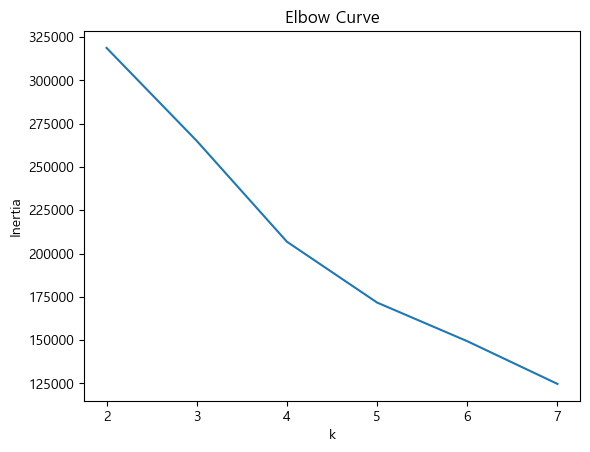

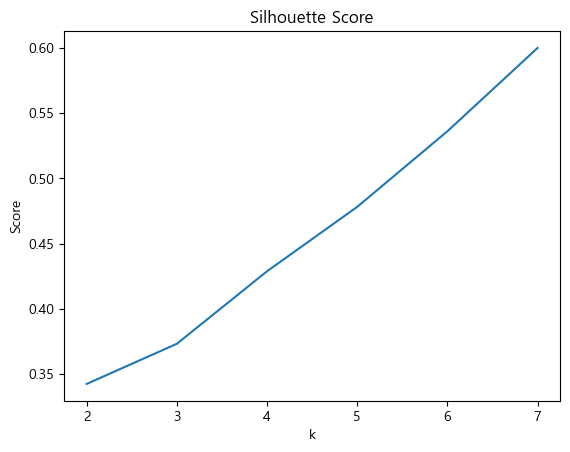

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

K_range = range(2, 8)   # 2~7개 군집 테스트

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))

plt.plot(K_range, inertia)
plt.title('Elbow Curve')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

plt.plot(K_range, silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

In [104]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [105]:
cluster_summary = df.groupby('cluster')[[
    'competency_label_1',
    'competency_label_2',
    'competency_label_3',
    'competency_label_4'
]].mean()

cluster_summary

,competency_label_1,competency_label_2,competency_label_3,competency_label_4
cluster,,,,
0,3.324131,2.957716,3.108708,2.979703
1,2.137943,2.803002,2.655606,2.866199
2,3.446340,4.013776,3.303014,2.988960
3,3.622739,3.407014,3.244442,4.009010


In [106]:
# 기존 kmeans와 scaler를 저장해두면 새 데이터에도 재사용 가능
import joblib

joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [124]:
df_new = pd.read_csv('real_students.csv')
print(df_new.columns)

Index(['ID', 'grade', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29',
       'Q30'],
      dtype='object')


In [125]:
variable_map = {
    'Analytical':['Q1','Q7','Q13','Q19'],
    'SelfDirected':['Q2','Q8','Q14','Q20'],
    'Collaborative':['Q3','Q9','Q15','Q21'],
    'Questioning':['Q4','Q10','Q16','Q22'],
    'Persistence':['Q5','Q11','Q17','Q23'],
    'Competitive':['Q6','Q12','Q18','Q24'],
    'FlexibleInnovation':['Q25','Q26','Q27','Q28'],
    'Motivation':['Q29'],
    'Leadership':['Q30']
}

# 각 변수 평균 계산
for var, qs in variable_map.items():
    df_new[var] = df_new[qs].mean(axis=1)

# 기존 군집 모델에 맞추기 위해 핵심 4개 변수 선택
competency_cols = ['Analytical','SelfDirected','Collaborative','Questioning']
X_new = df_new[competency_cols]

In [126]:
import joblib

# 이전에 저장한 scaler, kmeans 모델 불러오기
scaler_loaded = joblib.load('scaler.pkl')
kmeans_loaded = joblib.load('kmeans_model.pkl')


In [144]:
# 반드시 스케일러 학습 당시 컬럼과 동일한 순서, 이름 사용
df_new['competency_label_1'] = df_new['Analytical'].astype(float)
df_new['competency_label_2'] = df_new['SelfDirected'].astype(float)
df_new['competency_label_3'] = df_new['Collaborative'].astype(float)
df_new['competency_label_4'] = df_new['Questioning'].astype(float)

X_new = df_new[['competency_label_1','competency_label_2','competency_label_3','competency_label_4']]
X_new_scaled = scaler_loaded.transform(X_new)
df_new['Cluster'] = kmeans_loaded.predict(X_new_scaled)


In [145]:
cluster_feedback = {
    0: "기본 역량 미형성형: 자기관리, 문제 해결력 보완 필요",
    1: "자기주도형/사회성 낮음: 자기주도 학습 유지, 협력/의사소통 경험 확대",
    2: "사회·협력 중심형: 협력/포용 역량 활용, 문제 해결력 보완 필요",
    3: "문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능"
}

df_new['Feedback'] = df_new['Cluster'].map(cluster_feedback)


In [146]:
# 표준화
X_new_scaled = scaler_loaded.transform(X_new)

# 군집 배정
df_new['Cluster'] = kmeans_loaded.predict(X_new_scaled)

# 피드백 매핑
df_new['Feedback'] = df_new['Cluster'].map(cluster_feedback)

In [147]:
import matplotlib.pyplot as plt
from matplotlib import rc

# Windows 기본 한글 폰트 지정
rc('font', family='Malgun Gothic')

# 음수 값 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


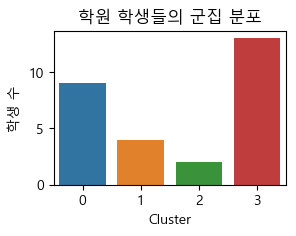

In [156]:
plt.figure(figsize=(3,2))
sns.countplot(x='Cluster', data=df_new)
plt.title("학원 학생들의 군집 분포")  # 이제 한글 정상 표시
plt.xlabel("Cluster")
plt.ylabel("학생 수")
plt.show()


In [149]:
print(df_new[['ID','Cluster','Feedback']])

    ID  Cluster                                 Feedback
0    1        3     문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
1    2        3     문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
2    3        3     문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
3    4        3     문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
4    5        3     문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
5    6        3     문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
6    7        0           기본 역량 미형성형: 자기관리, 문제 해결력 보완 필요
7    8        2     사회·협력 중심형: 협력/포용 역량 활용, 문제 해결력 보완 필요
8    9        2     사회·협력 중심형: 협력/포용 역량 활용, 문제 해결력 보완 필요
9   10        0           기본 역량 미형성형: 자기관리, 문제 해결력 보완 필요
10  11        0           기본 역량 미형성형: 자기관리, 문제 해결력 보완 필요
11  12        0           기본 역량 미형성형: 자기관리, 문제 해결력 보완 필요
12  13        3     문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
13  14        3     문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
14  15        3     문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
15  16        0           기본 역량 미형성형: 자기관리, 문제 해결력 보완 필요
16  17        1  자기주도형/사회성 낮음: 

In [150]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  28 non-null     int64  
 1   grade               28 non-null     int64  
 2   Q1                  28 non-null     int64  
 3   Q2                  28 non-null     int64  
 4   Q3                  28 non-null     int64  
 5   Q4                  28 non-null     int64  
 6   Q5                  28 non-null     int64  
 7   Q6                  28 non-null     int64  
 8   Q7                  28 non-null     int64  
 9   Q8                  28 non-null     int64  
 10  Q9                  28 non-null     int64  
 11  Q10                 28 non-null     int64  
 12  Q11                 28 non-null     int64  
 13  Q12                 28 non-null     int64  
 14  Q13                 28 non-null     int64  
 15  Q14                 28 non-null     int64  
 16  Q15       

In [151]:
print(df_new.columns)  # 컬럼 이름 전체 확인

Index(['ID', 'grade', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29',
       'Q30', 'Analytical', 'SelfDirected', 'Collaborative', 'Questioning',
       'Persistence', 'Competitive', 'FlexibleInnovation', 'Motivation',
       'Leadership', 'competency_label_1', 'competency_label_2',
       'competency_label_3', 'competency_label_4', 'Cluster', 'Feedback'],
      dtype='object')


In [161]:
df_new.head()  # 처음 10행만 출력

,ID,grade,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Competitive,FlexibleInnovation,Motivation,Leadership,competency_label_1,competency_label_2,competency_label_3,competency_label_4,Cluster,Feedback
0,1,4,4,2,3,4,3,3,3,4,...,3.5,3.25,2.0,4.0,3.50,2.75,3.25,4.25,3,문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
1,2,4,4,3,2,5,4,5,4,4,...,4.0,3.75,4.0,4.0,4.25,3.50,3.25,3.75,3,문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
2,3,4,5,3,5,5,5,5,5,3,...,3.5,4.50,5.0,5.0,4.75,3.25,5.00,4.75,3,문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
3,4,4,1,2,3,5,3,4,3,3,...,3.5,4.00,5.0,5.0,3.25,3.00,4.00,4.50,3,문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능
4,5,4,3,3,5,5,3,5,3,3,...,5.0,4.50,5.0,5.0,4.00,3.50,5.00,3.50,3,문제 해결력 최상위형: 창의적 문제 도전 및 동료 학습 지원 가능


In [153]:
df_new.to_csv('real_students.csv', index=False, encoding='utf-8-sig')

In [154]:
# 1) value_counts 사용 (없으면 0으로 채우기)
counts = df_new['Cluster'].value_counts().reindex([0,1,2,3], fill_value=0)
print(counts)


0     9
1     4
2     2
3    13
Name: Cluster, dtype: int64


In [155]:
print(df_new['Cluster'].dtype)

int32
